# [WS14/15] Mathematics for Robotics and Control: Assignment 001 - Frames

Welcome to Notebook! This would be the platform where you will be handing out your solutions for this course's assignments.

This week's assignment is about frames of references. As you have learned in the lecture, the concept of frames is of great importance in robotics. Consider a mobile robot (e.g. YouBot robot) that works in a lab delivering mail and packages. The robot is equipped with several sensors including a camera to perceive its environment and an end-effector gripper to grasp objects. You will use your knowledge on frames to help the robot complete its tasks.

First we will setup this notebook so that figures and plots can be shown in the notebook page.

In [24]:
import numpy
import matplotlib
from matplotlib import pylab, mlab, pyplot
np = numpy
plt = pyplot

from IPython.core.pylabtools import figsize, getfigs

from pylab import *
from numpy import *

---

**Hint**: You might want to check the the NumPy manual [1] before you start, in particular, read and understand the following functions:

```
array()
asarray()
sin()
cos()
tan()
radians()
hstack()
vstack()
dot()
delete()
linalg.inv()
linalg.det()
```

[1] http://docs.scipy.org/doc/numpy/genindex.html


## Picking up a package for the lab

The robot's task for today is to go to the reception and pick up a package that is laying on a cabinet. To do so, the robot has to complete the following  set of subtasks.

### Locate a door's pose relative to the robot's base frame

Assume the robot is located in a hallway that leads to the reception. The robot's camera is able to detect the pose of the reception's door. However, this pose is given relative to the camera's frame, $\left \{C \right \}$. For the robot to go inside the reception, it will need to know the pose of the door, $\left \{D \right \}$, relative to the robot's base frame, $\left \{B \right \}$. That is, we need the transform $^{B}_DT$.

If the camera locates the door frame, $\left \{D \right \}$, rotated relative to frame $\left \{C \right \}$ about $Z$ by $-13.215^o$ and about $Y$ by $-28.647^o$ (i.e. a rotation about $Z$ first, followed by a rotation in $Y$  using the *Z-Y-X*-Euler-angle convention); and with a relative translation of $(1.533, -0.354, 0.197)$ meters in $X,Y,$ and $Z$,  respectively. We also know the pose of the camera relative to the base, $^{B}_CT$. The camera frame, $\left \{C \right \}$, is located at $(-0.176, 0.035, 0.563)$ meters away from the base frame, and it is rotated relative to $\left \{B \right \}$ about $Y$ by $28.647^o$. 

Observe the following figure to get a visual description of the frames. The $X$ axis is represented by the color red, the $Y$ axis by the color green, and the color blue represents the $Z$ axis.

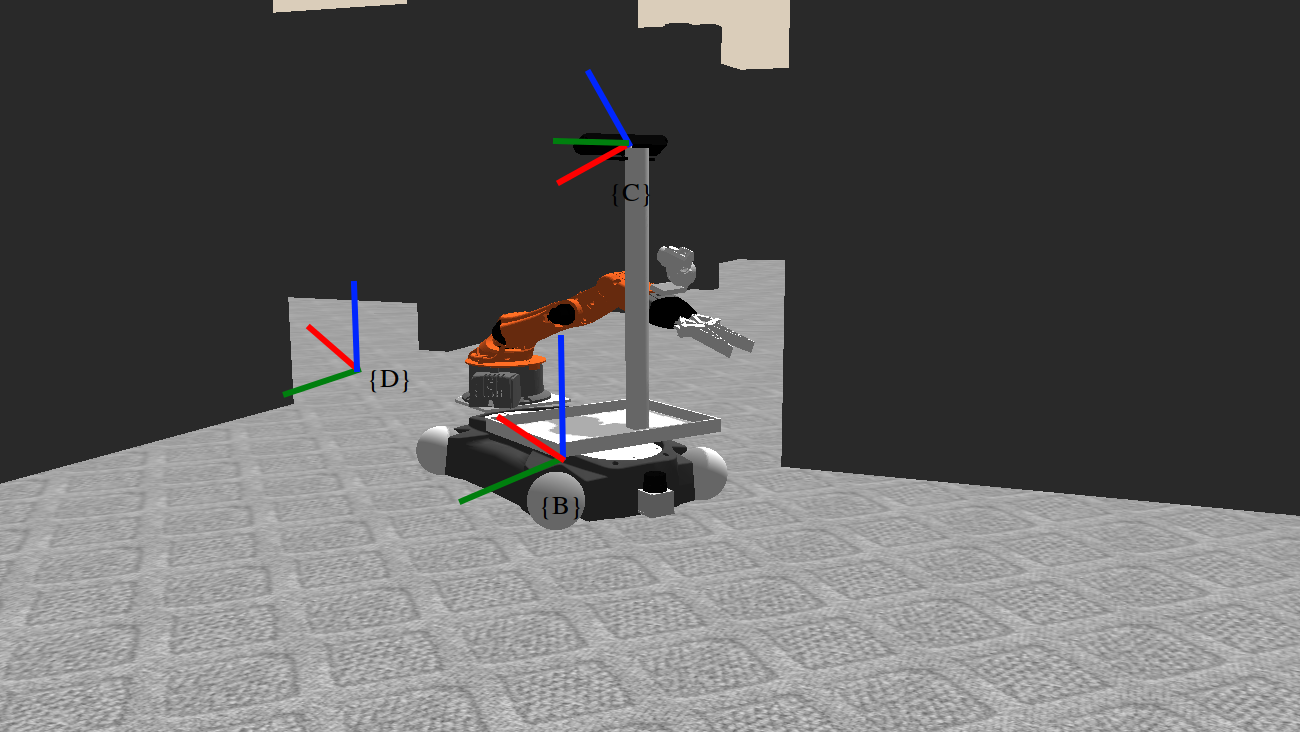

In [25]:
import IPython
IPython.core.display.Image("images/youbot_and_door.png", embed=True)

Calculate $^{B}_DT$, by completing the following function.

In [26]:
def direct_transform():
    import  numpy as np    
    x1=np.radians(-28.647)
    x2=np.radians(-13.215)
    x3=np.radians(90)
    x4=np.radians(28.647)

    rot_dc1 = np.array([[np.cos(x2),-np.sin(x2),0],[np.sin(x2),np.cos(x2),0],[0,0,1]])
    rot_dc2 = np.array([[np.cos(x1),0,np.sin(x1)],[0,1,0],[-np.sin(x1),0,np.cos(x1)]])
    rot_dc = np.dot(rot_dc1,rot_dc2)
    tansl_dc=np.array([[1.533],[-0.354],[0.197]])
    transf_dc=np.hstack([rot_dc,tansl_dc])
    final_transf_cd=np.vstack([transf_dc,[0,0,0,1]])

    #C relative to B

    rot_cb = np.array([[np.cos(x4),0,np.sin(x4)],[0,1,0],[-np.sin(x4),0,np.cos(x4)]])
    tansl_cb=np.array([[-0.176],[0.035],[0.563]])
    transf_cb=np.hstack([rot_cb,tansl_cb])
    final_transf_cb=np.vstack([transf_cb,[0,0,0,1]])

    #Final transform BDT.

    final_transf_db=np.dot(final_transf_cd,final_transf_cb)
    
    # return transform
    return final_transf_db
    raise NotImplementedError()

### Reaching for a package

In [27]:
 direct_transform()

array([[  9.73519087e-01,   2.28605745e-01,   5.55111512e-17,
          1.12787402e+00],
       [ -2.28605745e-01,   9.73519087e-01,   0.00000000e+00,
         -2.22914613e-01],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          6.06706678e-01],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]])

Once the robot has successfully entered the reception and approached the cabinet where the package is, it uses its object recognition software to find the package relative to the camera frame, $\left \{C \right \}$, at $(1.124, -0.060, 0.473)$ meters in $X,Y,$ and $Z$, respectively, and its rotated relative to frame $\left \{C \right \}$ about $Y$ by $-28.647^o$. This information corresponds to the transform <sup>C</sup><sub>P</sub>T.

From the previous subtask, we know the location of the camera relative, ${C}$, to the robot's base (given by <sup>B</sup><sub>C</sub>T). Furthermore, using the robot's kinematics we can calculate the transform describing the frame at the manipulator's end-effector, $\left \{E \right \}$, relative to the base frame, $\left \{B \right \}$. That is, <sup>B</sup><sub>E</sub>T. This is given by a translation of $(0.679, -0.019, 0.445)$ meters in $X,Y,$ and $Z$, respectively. Additionally, the end-effector has a rotation relative to frame $\left \{B \right \}$ about $Y$ by $90^o$.

If we want the robot to pick up this package, we will need to know the package's position and orientation with respect to the robot's end-effector. Your task is to calculate the pose of the package relative to the manipulator's end-effector,  i.e. compute <sup>E</sup><sub>P</sub>T. The following figure shows a description of the frames involved.

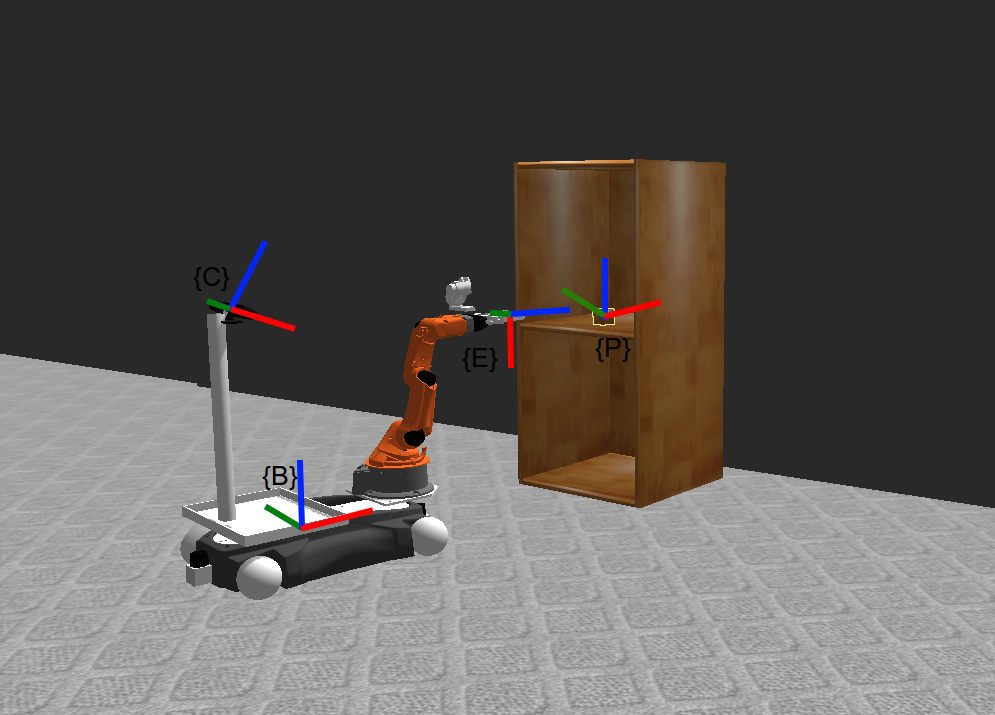

In [28]:
IPython.core.display.Image("images/youbot_and_package.png", embed=True)

Calculate $^{E}_PT$, by completing the following function.

In [29]:
from numpy.linalg import*
import numpy as np
def inverse_transform():
    
    x1=np.radians(-28.647)
    x2=np.radians(-13.215)
    x3=np.radians(90)
    x4=np.radians(28.647)    

    #P relative to C
    
    rot_pc = np.array([[np.cos(x1),0,np.sin(x1)],[0,1,0],[-np.sin(x1),0,np.cos(x1)]])
    tansl_pc=np.array([[1.124],[-0.060],[0.473]])
    transf_pc=np.hstack([rot_pc,tansl_pc])
    final_transf_pc=np.vstack([transf_pc,[0,0,0,1]])


    #C relative to B

    rot_cb = np.array([[np.cos(x1),0,np.sin(x1)],[0,1,0],[-np.sin(x1),0,np.cos(x1)]])
    tansl_cb=np.array([[1.533],[-0.354],[0.197]])
    transf_cb=np.hstack([rot_cb,tansl_cb])
    final_transf_cb=np.vstack([transf_cb,[0,0,0,1]])

    #E relative to B

    rot_eb = np.array([[np.cos(x3),0,np.sin(x3)],[0,1,0],[-np.sin(x3),0,np.cos(x3)]])
    tansl_eb=np.array([[0.679],[-0.019],[0.445]])
    transf_eb=np.hstack([rot_eb,tansl_eb])
    final_transf_eb=np.vstack([transf_eb,[0,0,0,1]])


    #Inverse of Transformation from E relative to B

    inv_final_transf_eb=inv(final_transf_eb)

    #P relative to E
    
    final_transf_pe1=np.dot(final_transf_cb,final_transf_pc)
    final_transf_pe=np.dot(inv_final_transf_eb,final_transf_pe1)
    # return transform
    return final_transf_pe

    raise NotImplementedError()

In [30]:
inverse_transform()

array([[-0.8414542 ,  0.        , -0.54032844, -0.70595906],
       [ 0.        ,  1.        ,  0.        , -0.395     ],
       [ 0.54032844,  0.        , -0.8414542 ,  1.61364933],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

## Review

The following tasks are meant to review the knowledge you have acquired on frames of references.

### Properties of a rotation matrix

Create a function, or functions, to verify if a given matrix is rotation matrix, i.e. proof that the given matrix has the properties of a rotation matrix. Briefly explain each property [1].

[1] http://en.wikipedia.org/wiki/Rotation_matrix#Properties_of_a_rotation_matrix

Complete the following function to determine if a given matrix is a rotation matrix.

In [31]:
def is_rotation_matrix(matrix):
    """
    This function returns True only if the input matrix is a rotation matrix 
    (based on the properties of a rotation matrix), otherwise it returns False.

    """
    # for each property you test, write a brief explanation of that property.
    # <your code here>
    # return True

#     raise NotImplementedError()

    #unless the matrix is square return false
    if (matrix.shape[0] == matrix.shape[1]):
        #check if determinant is 1 (matrix singular or not)
        det = np.linalg.det(matrix)
        #if (det == 1): 
        if( math.fabs( 1 - det ) < 0.001 ):
            #check whether transposed matrix is equal elemnt-wise to inverted matrix 
            transpose = np.matrix.transpose(matrix)
            inverse = np.linalg.inv(matrix)
            #if (transpose.all() == inverse.all()):
            if ( math.fabs( transpose.all() - inverse.all() ) < 0.001 ):
                t_i_prop = True
            else:
                t_i_prop = False
            #if length of test_vector does not change after multiplying matrix*test_vector, then matrix is rotational. 
            tv = np.arange(0, matrix.shape[0])
            t = tv.dot(np.asarray(matrix))
            t = t.dot(t)
            tv = tv.dot(tv)

            #if(math.sqrt(t) == math.sqrt(tv)):
            if( math.fabs( math.sqrt(t) - math.sqrt(tv)) < 0.001 ):
                rot = True
            else:
                rot =  False
            if(t_i_prop and rot):
                return True
            else:
                return False
        else:
            return False
    else:
        return False


### Validate your results using SymPy

In this task you will validate what you did in the previous tasks using *SymPy*, a Python library for symbolic mathematics [1]. Read and understand the class *ReferenceFrame* [2] and its methods *dcm*, *orient* and *orientnew* to validate your previous results:

[1] http://sympy.org/en/index.html

[2] http://docs.sympy.org/0.7.2/modules/physics/mechanics/api/essential.html

Calculate $^{B}_DT$, by completing the following function using `SymPy`.

In [32]:
import sympy.physics.mechanics as spm
from sympy.physics.mechanics import ReferenceFrame, Vector
import  numpy as np
from numpy.linalg import*

def direct_transform_sympy():
    
    x1=np.radians(-28.647)
    x2=np.radians(-13.215)
    x3=np.radians(90)
    x4=np.radians(28.647)

    C = ReferenceFrame('C')
    D1 = C.orientnew('D', 'Axis', [x2, C.z])
    rot_dc1_1 = C.dcm(D1)

    C = ReferenceFrame('C')
    D2 = C.orientnew('D', 'Axis', [x1, C.y])
    rot_dc2_1 = C.dcm(D2)

    rot_dc_1 = rot_dc1_1*rot_dc2_1
    tansl_dc_1=np.matrix([[1.533],[-0.354],[0.197]])
    transf_dc_1=np.hstack([rot_dc_1,tansl_dc_1])
    final_transf_cd=np.vstack([transf_dc_1,[0,0,0,1]])

    #C relative to B

    C = ReferenceFrame('C')
    B = C.orientnew('B', 'Axis', [x4, C.y])
    rot_cb_1= C.dcm(B)

    tansl_cb_1=np.matrix([[-0.176],[0.035],[0.563]])
    transf_cb_1=np.hstack([rot_cb_1,tansl_cb_1])
    final_transf_cb=np.vstack([transf_cb_1,[0,0,0,1]])

    #Final transform BDT.

    final_transf_db=final_transf_cd*final_transf_cb
    
    return final_transf_db
    return B
    return D1
    return D2
 
    raise NotImplementedError()

In [33]:
direct_transform_sympy()

matrix([[0.973519087391822, 0.228605744643030, 5.55111512312578e-17,
         1.12787402006687],
        [-0.228605744643030, 0.973519087391822, 0, -0.222914613005951],
        [0, 0, 1.00000000000000, 0.606706677636382],
        [0, 0, 0, 1.0]], dtype=object)

Calculate $^{E}_PT$, by completing the following function using `SymPy`.

In [34]:
import sympy.physics.mechanics as spm
from sympy.physics.mechanics import ReferenceFrame, Vector
import  numpy as np
from numpy.linalg import*

def inverse_transform_sympy():
   
    x1=np.radians(-28.647)
    x2=np.radians(-13.215)
    x3=np.radians(90)
    x4=np.radians(28.647)
    
    #///////////////////////////////////////////////////////////////////////////

    C = ReferenceFrame('C')
    P = C.orientnew('P', 'Axis', [x1, C.y])
    rot_pc_1 = C.dcm(P)
    tansl_pc_1=np.array([[1.124],[-0.060],[0.473]])
    transf_pc_1=np.hstack([rot_pc_1,tansl_pc_1])
    final_transf_pc=np.vstack([transf_pc_1,[0,0,0,1]])

    #///////////////////////////////////////////////////////////////////////////

    B = ReferenceFrame('B')
    C = B.orientnew('C', 'Axis', [x1, B.y])
    rot_cb_1 = B.dcm(C)
    tansl_cb_1=np.array([[1.533],[-0.354],[0.197]])
    transf_cb_1=np.hstack([rot_cb_1,tansl_cb_1])
    final_transf_cb=np.vstack([transf_cb_1,[0,0,0,1]])

    #///////////////////////////////////////////////////////////////////

    E = ReferenceFrame('E')
    B = E.orientnew('B', 'Axis', [x3, E.y])
    rot_eb_1 = E.dcm(B)
    tansl_eb_1=np.array([[0.679],[-0.019],[0.445]])
    transf_eb_1=np.hstack([rot_eb_1,tansl_eb_1])
    final_transf_eb=np.vstack([transf_eb_1,[0,0,0,1]])

    #/////////////////////////////////////////////////////////////////////

    inv_final_transf_eb=inv(final_transf_eb)

    #/////////////////////////////////////////////////////////////////////
    
    final_transf_pe1=np.dot(final_transf_cb,final_transf_pc)
    final_transf_pe=np.dot(inv_final_transf_eb,final_transf_pe1)

    # <your code here>
    # return transform, end_effector_frame, package_frame
    return final_transf_pe
    return E
    return P
    
    raise NotImplementedError()

In [35]:
inverse_transform_sympy()

array([[-0.841454203497244, 0, -0.540328440318311, -0.705959060548151],
       [0, 1.00000000000000, 0, -0.395000000000000],
       [0.540328440318311, 0, -0.841454203497244, 1.61364933409968],
       [0, 0, 0, 1.00000000000000]], dtype=object)

### Simple simulator exercise: Let the robot drive in a given pattern (square, predefined path etc.)